Datos cargados correctamente.
Diagnóstico inicial:
{'media': age           60.464752
diameter_1    11.897055
diameter_2     8.852209
dtype: float64, 'desviacion_estandar': age           15.894866
diameter_1     8.634492
diameter_2     5.797036
dtype: float64, 'valor_minimo': age           6.0
diameter_1    0.0
diameter_2    0.0
dtype: float64, 'valor_maximo': age            94.0
diameter_1    100.0
diameter_2     70.0
dtype: float64, 'valores_faltantes': age             0
diameter_1    804
diameter_2    804
dtype: int64}
Valores imputados correctamente.
Datos escalados correctamente.


c:\Users\Jose\Desktop\Diplomado-Python-2024\Modulo_4\Clase_4\Miniproyecto_1\proyecto_lesiones.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.data[col].fillna(self.data[col].mean(), inplace=True)
c:\Users\Jose\Desktop\Diplomado-Python-2024\Modulo_4\Clase_4\Miniproyecto_1\proyecto_lesiones.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the interme

Modelo naive_bayes guardado en modelo_naive_bayes.pkl.
Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.59      0.91      0.71       191
        True       0.89      0.55      0.68       269

    accuracy                           0.70       460
   macro avg       0.74      0.73      0.69       460
weighted avg       0.76      0.70      0.69       460

Modelo logistic_regression guardado en modelo_logistic_regression.pkl.
Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.66      0.23      0.34       191
        True       0.63      0.91      0.74       269

    accuracy                           0.63       460
   macro avg       0.64      0.57      0.54       460
weighted avg       0.64      0.63      0.58       460



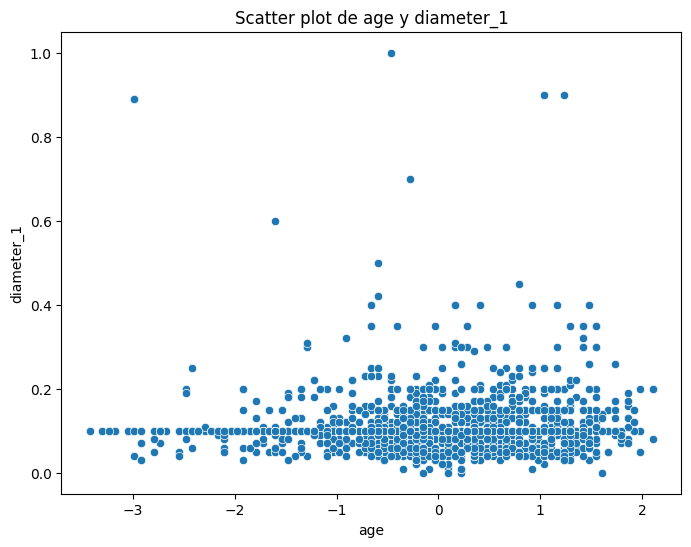

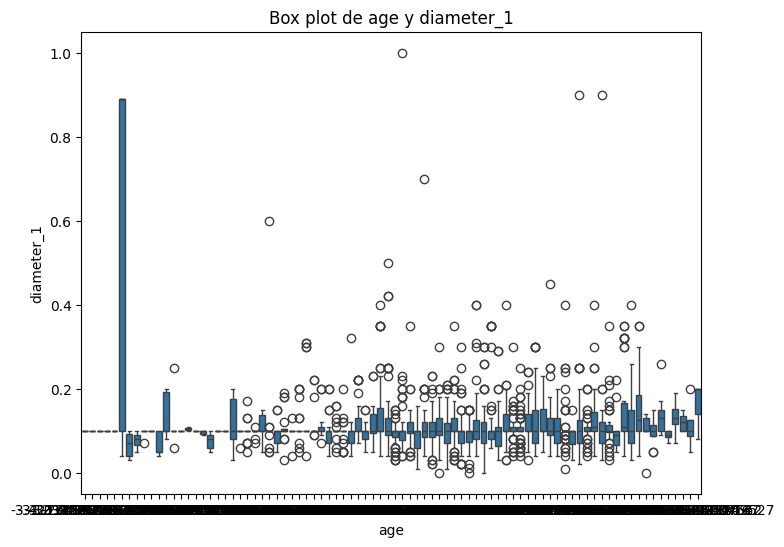

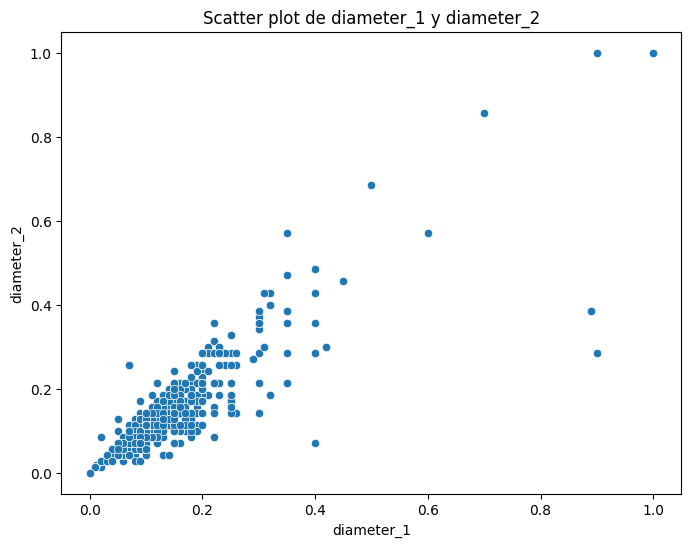

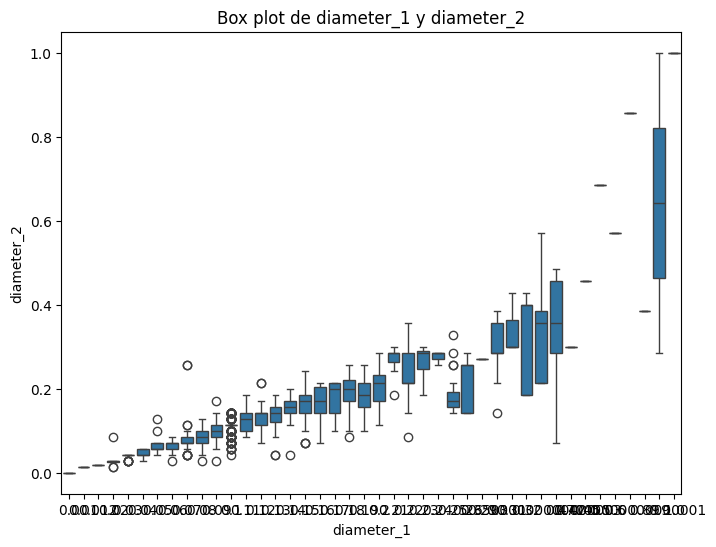

In [1]:
from proyecto_lesiones import Preprocesamiento, clasificador, evaluar_rendimiento

# Configuración de los datos
ruta_datos = 'metadatos.csv'
columnas = ['age', 'diameter_1', 'diameter_2', 'biopsed']  # Ejemplo de columnas relevantes
descriptores = ['age', 'diameter_1', 'diameter_2']
estrategias_imputacion = {
    'age': 'mean',
    'diameter_1': 'median',
    'diameter_2': 'median'
}
estrategias_escalamiento = {
    'age': 'z-score',
    'diameter_1': 'min-max',
    'diameter_2': 'min-max'
}

# Crear instancia de la clase Preprocesamiento
preprocesador = Preprocesamiento(ruta_datos, usar_muestra=False, columnas=columnas)

# Ejecutar el preprocesamiento
preprocesador.ejecutar_procesamiento(descriptores, estrategias_imputacion, estrategias_escalamiento)


# Generar gráficos de dispersión y caja
preprocesador.generar_graficos(columnas=['age', 'diameter_1'], tipo='scatter', guardar=True)
preprocesador.generar_graficos(columnas=['age', 'diameter_1'], tipo='box', guardar=True)

# Generar más gráficos para otros descriptores
preprocesador.generar_graficos(columnas=['diameter_1', 'diameter_2'], tipo='scatter', guardar=True)
preprocesador.generar_graficos(columnas=['diameter_1', 'diameter_2'], tipo='box', guardar=True)


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = preprocesador.dividir_datos(columna_objetivo='biopsed')

# Entrenar modelo Naive Bayes
clasificador(
    tipo='naive_bayes',
    ruta_guardado='modelo_naive_bayes.pkl',
    X_train=X_train,
    y_train=y_train
)

# Evaluar modelo Naive Bayes
evaluar_rendimiento(
    ruta_modelo='modelo_naive_bayes.pkl',
    X_test=X_test,
    y_test=y_test,
    tipo_analisis='metricas'
)

# Entrenar modelo Regresión Logística
clasificador(
    tipo='logistic_regression',
    ruta_guardado='modelo_logistic_regression.pkl',
    X_train=X_train,
    y_train=y_train,
    penalty='l2',
    C=1.0
)

# Evaluar modelo Regresión Logística
evaluar_rendimiento(
    ruta_modelo='modelo_logistic_regression.pkl',
    X_test=X_test,
    y_test=y_test,
    tipo_analisis='metricas'
)

El modelo de Naive Bayes parece ser el más eficaz, con una mayor accuracy en la clasificación de la clase True, aunque con un recall relativamente bajo para la clase False.

La Regresión Logística, aunque muestra un buen rendimiento para la clase True (verdadero de la biopsia), tiene un bajo rendimiento en la clasificación de la clase False, una baja precisión general.